In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import sys
import os
sys.path.insert(0, '..')
import spectral_denoising as sd
from spectral_denoising.spectral_operations import *

# denoise a single spectrum

In [2]:
query_data = sd.read_msp('../sample_data/noisy_spectra.msp').iloc[0]
reference_data= sd.read_msp('../sample_data/clean_spectra.msp').iloc[0]
query_spectrum, query_smiles, query_adduct, query_pmz = query_data['peaks'], query_data['smiles'], query_data['adduct'], query_data['precursor_mz']
reference_spectrum = reference_data['peaks']

the raw spectra has spectral entropy of 3.54
entropy similarity is 0.6735841631889343


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/test_env/lib/python3.12/site-packages/matplotlib/pyplot.py'>

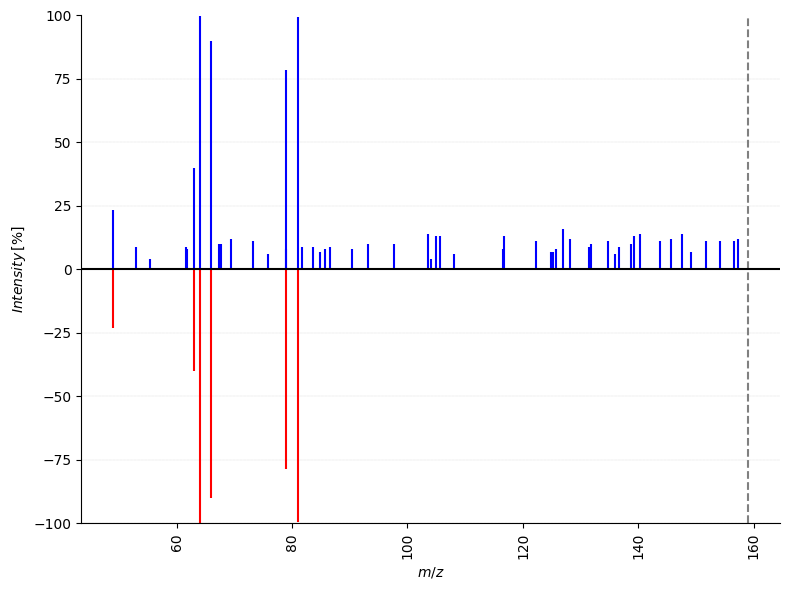

In [5]:
print(f'the raw spectra has spectral entropy of {spectral_entropy(query_spectrum):.2f}')
sd.head_to_tail_plot(query_spectrum, reference_spectrum, pmz = query_pmz)

the denoised spectra has spectral entropy of 1.69
entropy similarity is 1.0


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/test_env/lib/python3.12/site-packages/matplotlib/pyplot.py'>

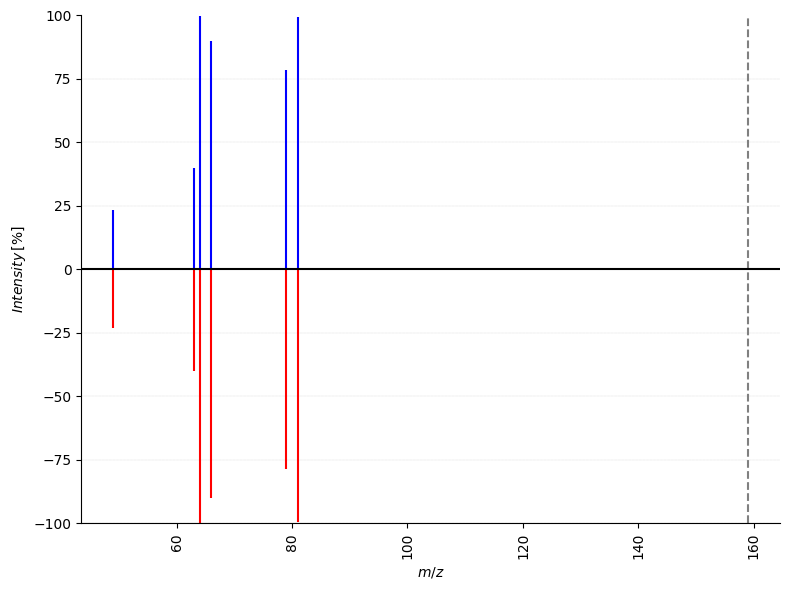

In [6]:
denoised_spectrum = sd.spectral_denoising(query_spectrum, query_smiles, query_adduct) 

print(f'the denoised spectra has spectral entropy of {spectral_entropy(denoised_spectrum):.2f}')
sd.head_to_tail_plot(denoised_spectrum, reference_spectrum, pmz = query_pmz)
#denoise the spectrum based on the smiles/adduct information

# likely, you can perform spectral denoising on all spectra in a given msp file

In [7]:
query_data = sd.read_msp('../sample_data/noisy_spectra.msp')
reference_data= sd.read_msp('../sample_data/clean_spectra.msp').iloc[0]
pmz, reference_spectra = reference_data['precursor_mz'],reference_data['peaks']

In [8]:
query_spectra,query_smiles,query_adducts = query_data['peaks'],query_data['smiles'],query_data['adduct']
denoised_spectra = sd.spectral_denoising_batch(query_spectra,query_smiles,query_adducts)

100%|██████████| 1/1 [00:00<00:00, 1305.42it/s]


entropy similarity is 0.6735841631889343


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/test_env/lib/python3.12/site-packages/matplotlib/pyplot.py'>

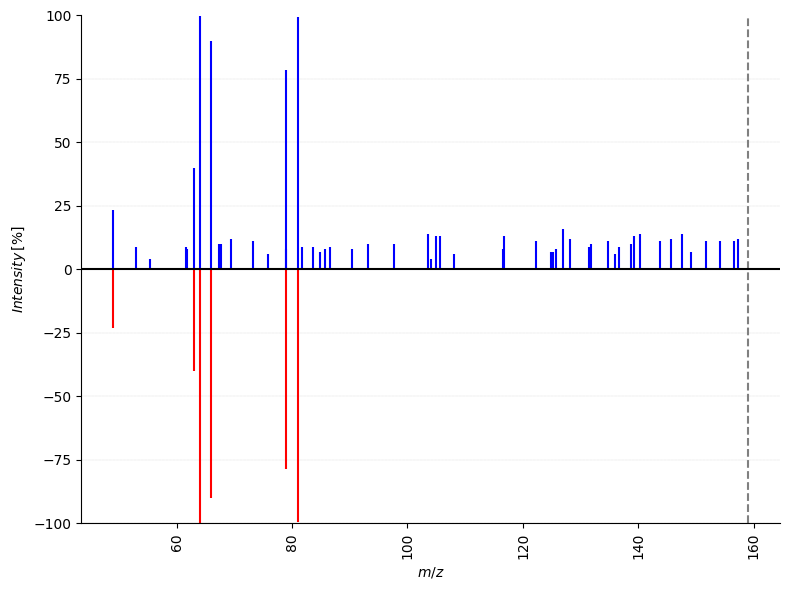

In [9]:
#likely, you can visualize the results via head_to_tail_plot...
sd.head_to_tail_plot(query_spectra[0], reference_spectra, pmz = pmz)# this raw against reference

entropy similarity is 1.0


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/test_env/lib/python3.12/site-packages/matplotlib/pyplot.py'>

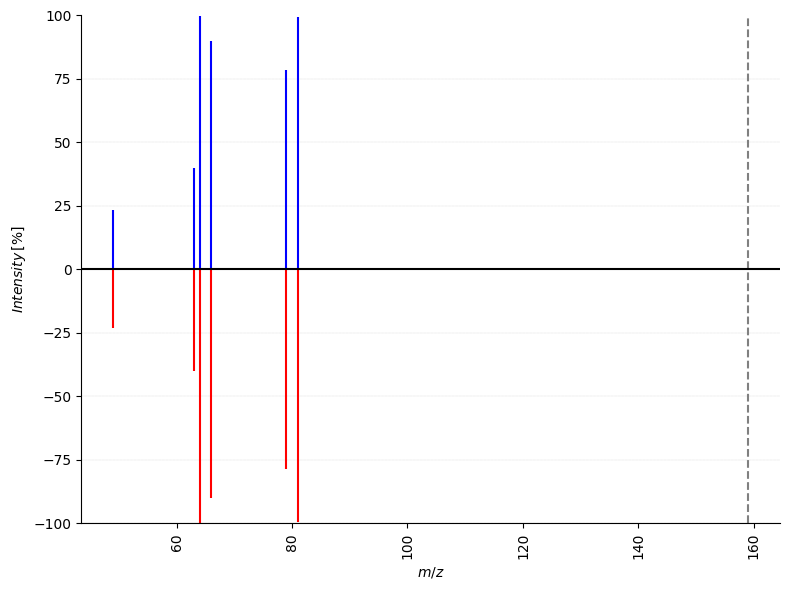

In [10]:
sd.head_to_tail_plot(denoised_spectra[0], reference_spectra, pmz = pmz)